In [141]:
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import colour
import numpy as np
from pylab import rcParams
rcParams['figure.figsize'] = 10, 10

In [4]:
df = pd.read_pickle("/home/maksim/Documents/CEBA/Itten_files/new_abstract_9.pkl")

In [5]:
df.mean_h

0       31.058301
1       27.532827
2       43.565471
3       25.446169
4       21.305790
          ...    
4228    52.858247
4229    39.935599
4230    17.588020
4231    39.159549
4232    44.164096
Name: mean_h, Length: 4233, dtype: float64

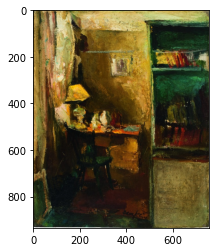

In [6]:
path = df.Paths[0]
img_BGR = cv2.imread(path)
img_CIEXYZ = cv2.cvtColor(img_BGR, cv2.COLOR_BGR2XYZ)
plt.imshow(cv2.cvtColor(img_BGR, cv2.COLOR_BGR2RGB))
plt.show()

In [95]:
def get_mean_CCT(path):
    img_XYZ = cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2XYZ)
    img_xy = colour.XYZ_to_xy(img_XYZ)
    img_CCT = colour.temperature.xy_to_CCT(img_xy, 'Hernandez 1999')
    return np.mean(img_CCT[(img_CCT > 4000) & (img_CCT < 25000)])

In [97]:
df['CCT'] = df.Paths.apply(lambda x: get_mean_CCT(x))

/home/maksim/anaconda3/envs/paintings/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


In [127]:
df['mean_h'] = df['mean_h']*2

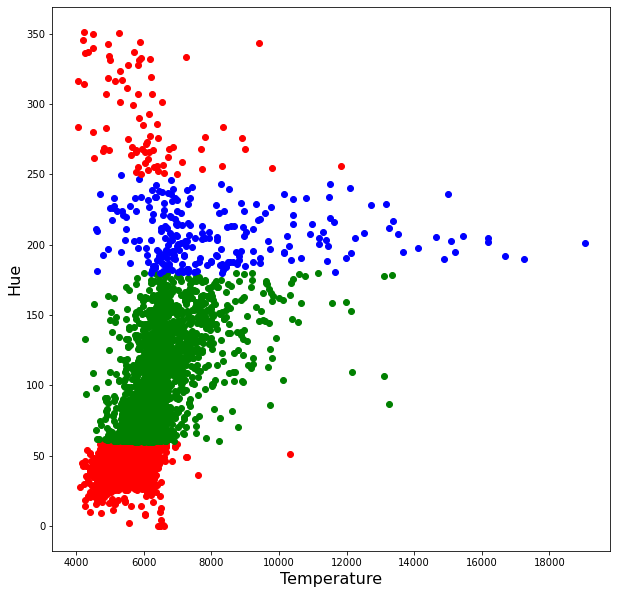

In [144]:

plt.scatter(df[df['mean_h'] < 60]['CCT'], df[df['mean_h'] < 60]['mean_h'], color = 'red')
plt.scatter(df[(df['mean_h'] > 60) & (df['mean_h'] < 180) ]['CCT'], df[(df['mean_h'] > 60) & (df['mean_h'] < 180)]['mean_h'], color = 'green')
plt.scatter(df[(df['mean_h'] > 180) & (df['mean_h'] < 250) ]['CCT'], df[(df['mean_h'] > 180) & (df['mean_h'] < 250)]['mean_h'], color = 'blue')
plt.scatter(df[(df['mean_h'] > 250)]['CCT'], df[(df['mean_h'] > 250)]['mean_h'], color = 'red')

plt.xlabel('Temperature', fontsize=16)
plt.ylabel('Hue', fontsize=16)
plt.savefig('hue_temperature_relationship.png')
plt.show()

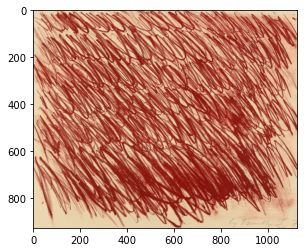

In [121]:
path_low_h = df[df['mean_h'] < 10].iloc[0].Paths
plt.imshow(cv2.cvtColor(cv2.imread(path_low_h), cv2.COLOR_BGR2RGB))
plt.show()

<AxesSubplot:>

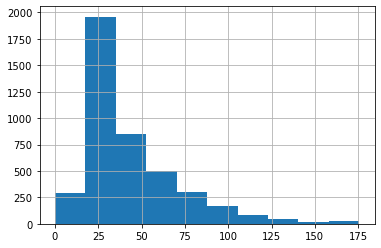

In [125]:
(df['mean_h']).hist()

In [ ]:
 [colour.XYZ_to_xy(pixel) for pixel in img_CIEXYZ]

In [59]:
colour.temperature.xy_to_CCT([[0.4,0.3],[0.3,0.4]])

array([ 4799.78685975,  5238.73991966])

In [23]:
colour.temperature.xy_to_CCT((55, 61))

/home/maksim/anaconda3/envs/paintings/lib/python3.8/site-packages/colour/utilities/verbose.py:237: ColourUsageWarning: Correlated colour temperature must be in domain [4000, 25000], unpredictable results may occur!
  warn(*args, **kwargs)


2244.3824768066406